# Generate the label file for your clusters

In [1]:
import pickle
dict = {0 : ['book cover', 'closed book'], 1 : ['open book', 'double spread'], 2: ['book shelf', 'library']}
f = open("labels.pkl","wb")
pickle.dump(dict,f)
f.close()

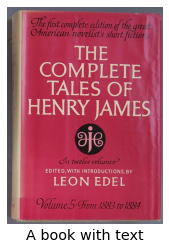

In [1]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

COMPUTER_VISION_SUBSCRIPTION_KEY = ''
COMPUTER_VISION_ENDPOINT = 'https://[accountname].cognitiveservices.azure.com/'


# Add your Computer Vision subscription key and endpoint to your environment variables.
subscription_key = COMPUTER_VISION_SUBSCRIPTION_KEY


endpoint = COMPUTER_VISION_ENDPOINT

analyze_url = endpoint + "vision/v3.1/analyze"

# Set image_path to the local path of an image that you want to analyze.
# Sample images are here, if needed:
# https://github.com/Azure-Samples/cognitive-services-sample-data-files/tree/master/ComputerVision/Images
image_path = "../data/test/0e72faf4ac2e2c1e.jpg"

# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}
params = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
#print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

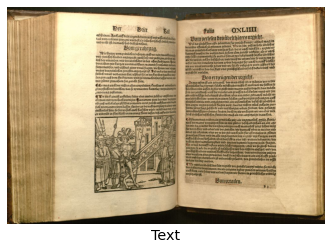

In [2]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

COMPUTER_VISION_SUBSCRIPTION_KEY = ''
COMPUTER_VISION_ENDPOINT = 'https://[key].cognitiveservices.azure.com/'


# Add your Computer Vision subscription key and endpoint to your environment variables.
subscription_key = COMPUTER_VISION_SUBSCRIPTION_KEY


endpoint = COMPUTER_VISION_ENDPOINT

analyze_url = endpoint + "vision/v3.1/analyze"

# Set image_path to the local path of an image that you want to analyze.
# Sample images are here, if needed:
# https://github.com/Azure-Samples/cognitive-services-sample-data-files/tree/master/ComputerVision/Images
image_path = "../data/test/0a0e07d62b37e562.jpg"

# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}
params = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
#print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

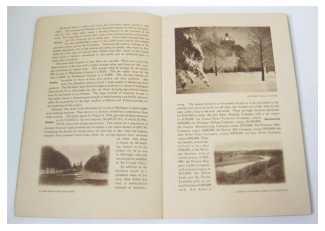

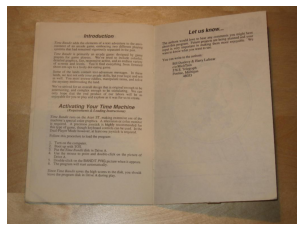

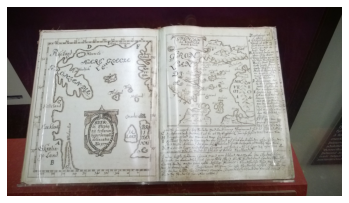

In [3]:
import os
from azure.core.credentials import AzureKeyCredential
from azure.search.documents import SearchClient
import base64
import io

SEARCH_ENDPOINT = "https://[search endpoint]].search.windows.net"

index_name = "clustering-index";
# Get the service endpoint and API key from the environment
endpoint = SEARCH_ENDPOINT
key = ""

# Create a client
credential = AzureKeyCredential(key)
client = SearchClient(endpoint=endpoint,
                      index_name=index_name,
                      credential=credential)


results = client.search(search_text="open", top=3)

for result in results:
    book = str(base64.urlsafe_b64decode(result["id"].strip() + "=="))
    book_index = book.find("books/")
    image_path = "../data/test/books/" + book[book_index+6:-3]
    image_data = open(image_path, "rb").read()
    image = Image.open(BytesIO(image_data))
    plt.imshow(image)
    plt.axis("off")
    _ = plt.title("", size="x-large", y=-0.1)
    plt.show()